# A/B Test

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t

RESULTS:
alpha = 0.05,  z_alpha = 1.64, threshold_alpha = 76.45
beta = 0.2, z_beta = 0.84, threshold_beta = 53.58
Reject null hypothesis: False given p_value is 0.14


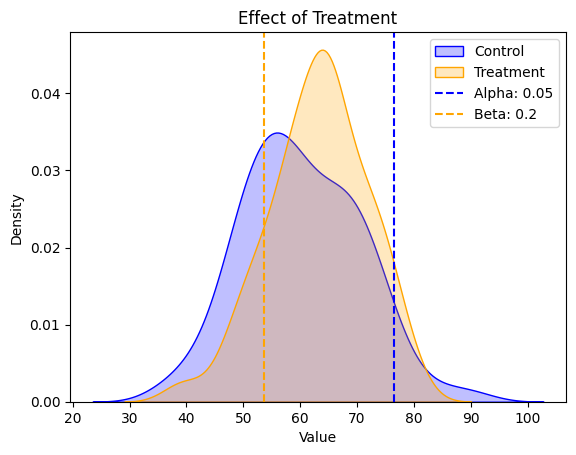

In [5]:
def visualize_distributions(mu1, sigma1, mu2, sigma2, alpha, beta, n1, n2):
    """
    The purpose of this function is to visualize and compare the distribution of control and treatment groups, represented by normal distributions,
    and illustrate the thresholds associated with Type I and Type II error rates.

    This function generates two overlaid density plots to help visualize the potential effect of a treatment.
    It calculates and displays the critical z-values for both alpha and beta, and annotates the plot with
    these critical values. Additionally, the function computes the test statistic and p-value for the difference
    between the two groups.

    Parameters:
    - mu1 (float): Mean of the control group's normal distribution.
    - sigma1 (float): Standard deviation of the control group's normal distribution.
    - mu2 (float): Mean of the treatment group's normal distribution.
    - sigma2 (float): Standard deviation of the treatment group's normal distribution.
    - alpha (float): Significance level used to determine the critical value for Type I error (false positive rate).
    - beta (float): Beta value used to determine the critical value for Type II error (false negative rate).
    - n1 (int): Sample size of the control group.
    - n2 (int): Sample size of the treatment group.

    Returns:
    None. This function plots the distributions and critical values but does not return any values.
    """

    # Generate random samples for both distributions
    control_samples = np.random.normal(mu1, sigma1, size=n1)
    treatment_samples = np.random.normal(mu2, sigma2, size=n2)

    # Calculate the sample standard deviations
    s1 = np.std(control_samples, ddof=1)
    s2 = np.std(treatment_samples, ddof=1)

    # Calculate the test statistic using the z-test formula for large samples
    pooled_se = np.sqrt(s1**2/n1 + s2**2/n2)
    z_statistic = (mu2 - mu1) / pooled_se

    # Calculate the p-value for the z-test
    p_value = 2 * (1 - norm.cdf(np.abs(z_statistic)))

    # Calculate critical z-values for alpha and beta
    z_alpha = norm.ppf(1 - alpha)
    z_beta = norm.ppf(1 - beta)

    # Calculate thresholds for visualizing alpha and beta
    threshold_alpha = mu1 + z_alpha * sigma1
    threshold_beta = mu2 - z_beta * sigma2
    
    # Print results
    print(f'RESULTS:')
    print(f'alpha = {alpha},  z_alpha = {z_alpha:.2f}, threshold_alpha = {threshold_alpha:.2f}')
    print(f'beta = {beta}, z_beta = {z_beta:.2f}, threshold_beta = {threshold_beta:.2f}')
    print(f'Reject null hypothesis: {p_value < alpha} given p_value is {p_value:.2f}')

    # Create a density plot for the control distribution and the treatment distribution
    sns.kdeplot(control_samples, fill=True, color='blue', label='Control')
    sns.kdeplot(treatment_samples, fill=True, color='orange', label='Treatment')

    # Plot vertical lines at the critical values for alpha and beta
    plt.axvline(x=threshold_alpha, linestyle='--', color='blue', label=f'Alpha: {alpha}')
    plt.axvline(x=threshold_beta, linestyle='--', color='orange', label=f'Beta: {beta}')

    # Set labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Effect of Treatment')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

# Parameters for control distribution
CTR_mu, CTR_sigma = 60, 10

# Parameters for treatment distribution
TRM_mu, TRM_sigma = 62, 10

# Significance level (alpha) and power (1 - beta)
alpha, beta= 0.05, 0.20

n1, n2 = 100, 100

# Visualize the distributions
visualize_distributions(CTR_mu, CTR_sigma, TRM_mu, TRM_sigma, alpha, beta, n1, n2)